In [1]:
with open("C://Users/rdsla/Downloads/eng.train") as f:
    data = f.read().split('\n')

with open("C://Users/rdsla/Downloads/eng.testa") as f:
    val_data = f.read().split('\n')

In [2]:
# CUda has been acting up lately....This resolves an error
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
data

['-DOCSTART- -X- -X- O',
 '',
 'EU NNP I-NP I-ORG',
 'rejects VBZ I-VP O',
 'German JJ I-NP I-MISC',
 'call NN I-NP O',
 'to TO I-VP O',
 'boycott VB I-VP O',
 'British JJ I-NP I-MISC',
 'lamb NN I-NP O',
 '. . O O',
 '',
 'Peter NNP I-NP I-PER',
 'Blackburn NNP I-NP I-PER',
 '',
 'BRUSSELS NNP I-NP I-LOC',
 '1996-08-22 CD I-NP O',
 '',
 'The DT I-NP O',
 'European NNP I-NP I-ORG',
 'Commission NNP I-NP I-ORG',
 'said VBD I-VP O',
 'on IN I-PP O',
 'Thursday NNP I-NP O',
 'it PRP B-NP O',
 'disagreed VBD I-VP O',
 'with IN I-PP O',
 'German JJ I-NP I-MISC',
 'advice NN I-NP O',
 'to TO I-PP O',
 'consumers NNS I-NP O',
 'to TO I-VP O',
 'shun VB I-VP O',
 'British JJ I-NP I-MISC',
 'lamb NN I-NP O',
 'until IN I-SBAR O',
 'scientists NNS I-NP O',
 'determine VBP I-VP O',
 'whether IN I-SBAR O',
 'mad JJ I-NP O',
 'cow NN I-NP O',
 'disease NN I-NP O',
 'can MD I-VP O',
 'be VB I-VP O',
 'transmitted VBN I-VP O',
 'to TO I-PP O',
 'sheep NN I-NP O',
 '. . O O',
 '',
 'Germany NNP I-NP I

In [4]:
def make_text_data(data):
    text = []
    sent = []
    targets = []
    tags = []
    for i in data:
        if i=='':
            text.append(sent)
            targets.append(tags)
            tags = []
            sent = []
        else:
            tmp = i.split(" ")
            sent.append(tmp[0])
            tags.append(tmp[3])
    return text, targets

In [5]:
text, targets = make_text_data(data)

In [6]:
val_text, val_targets = make_text_data(val_data)

In [67]:
for i in zip(text[1],targets[1]):
    print(i)

('EU', 'I-ORG')
('rejects', 'O')
('German', 'I-MISC')
('call', 'O')
('to', 'O')
('boycott', 'O')
('British', 'I-MISC')
('lamb', 'O')
('.', 'O')


In [8]:
from collections import Counter
words = []
for entry in text:
    for word in entry:
        words.append(word)

In [9]:
wc = Counter(words)
len(wc)

23624

In [10]:
word_map = {}
for i,(k,v) in enumerate(wc.most_common()):
    word_map[k] = i+2
word_map['<pad>']=0
word_map['<unk>']=1


In [11]:
word_map

{'.': 2,
 ',': 3,
 'the': 4,
 'of': 5,
 'in': 6,
 'to': 7,
 'a': 8,
 '(': 9,
 ')': 10,
 'and': 11,
 '"': 12,
 'on': 13,
 'said': 14,
 "'s": 15,
 'for': 16,
 '1': 17,
 '-': 18,
 'The': 19,
 'was': 20,
 '2': 21,
 '-DOCSTART-': 22,
 '0': 23,
 '3': 24,
 'at': 25,
 'with': 26,
 'that': 27,
 'from': 28,
 'by': 29,
 'is': 30,
 ':': 31,
 'as': 32,
 'he': 33,
 '4': 34,
 'had': 35,
 'has': 36,
 'it': 37,
 'his': 38,
 'not': 39,
 'were': 40,
 'be': 41,
 'an': 42,
 'have': 43,
 'after': 44,
 'who': 45,
 'will': 46,
 '5': 47,
 'but': 48,
 'first': 49,
 'U.S.': 50,
 'been': 51,
 '$': 52,
 '--': 53,
 'two': 54,
 'are': 55,
 'their': 56,
 '6': 57,
 'beat': 58,
 'which': 59,
 'would': 60,
 'up': 61,
 'I': 62,
 'its': 63,
 'they': 64,
 'percent': 65,
 'year': 66,
 'out': 67,
 'Thursday': 68,
 'this': 69,
 'last': 70,
 'million': 71,
 'over': 72,
 'Wednesday': 73,
 'one': 74,
 '7': 75,
 'government': 76,
 'against': 77,
 '/': 78,
 'police': 79,
 'when': 80,
 'second': 81,
 'also': 82,
 'Tuesday': 83,
 'H

In [12]:
tags = []
for entry in targets:
    for tag in entry:
        tags.append(tag)
        

In [13]:
tags = list(set(tags))

In [14]:
tag_map = {}
for i,v in enumerate(tags):
    tag_map[v] = i+1
    tag_map[0] = 0
    

In [15]:
tag_map

{'I-MISC': 1,
 0: 0,
 'I-LOC': 2,
 'I-PER': 3,
 'O': 4,
 'I-ORG': 5,
 'B-LOC': 6,
 'B-MISC': 7,
 'B-ORG': 8}

In [16]:
#[x+1 if x >= 45 else x+5 for x in l]
X = []
y=[]
for sent in text:
    X.append([word_map[i] for i in sent])
for seq in targets:
    y.append([tag_map[i] for i in seq])
X_val = []
y_val = []
for sent in val_text:
    X_val.append([word_map[i] if i in word_map.keys() else 1 for i in sent])
for seq in val_targets:
    y_val.append([tag_map[i] for i in seq])

In [17]:
print(max([len(i) for i in X]))


113


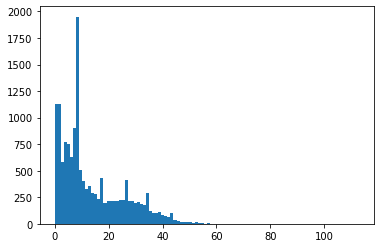

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([len(i) for i in X],bins=100)
plt.show()

In [19]:
import numpy as np
print(np.quantile([len(i) for i in X],0.75))
print(np.quantile([len(i) for i in X],0.95))
print(np.quantile([len(i) for i in X],0.99))


21.0
37.0
45.0


In [20]:
max_len = 37
from tensorflow.keras.preprocessing import sequence
X = sequence.pad_sequences(X, maxlen=max_len)
y = sequence.pad_sequences(y, maxlen=max_len)
X_val = sequence.pad_sequences(X_val, maxlen=max_len)
y_val = sequence.pad_sequences(y_val, maxlen=max_len)


In [65]:
X[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,   959, 11985,   235,   764,     7,  4149,   211,  6184,
           2])

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
safety = EarlyStopping(monitor='val_loss', patience=1)
# create the model
word_vector_len = 100
model1 = Sequential()
model1.add(Embedding(len(word_map), word_vector_len, input_length=max_len))
model1.add(Bidirectional(LSTM(256, return_sequences=True)))
model1.add(Dropout(0.25))
model1.add(TimeDistributed(Dense(len(tag_map),activation='softmax')))

In [28]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X,y, epochs=100, validation_data=(X_val,y_val), batch_size=20, callbacks = [safety])

Epoch 1/100
750/750 [==============================] - 26s 31ms/step - loss: 0.3326 - accuracy: 0.9177 - val_loss: 0.0724 - val_accuracy: 0.9801
Epoch 2/100
750/750 [==============================] - 21s 28ms/step - loss: 0.0355 - accuracy: 0.9901 - val_loss: 0.0489 - val_accuracy: 0.9859
Epoch 3/100
750/750 [==============================] - 22s 29ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.0527 - val_accuracy: 0.9855


In [62]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 37, 100)           2362600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 37, 512)           731136    
_________________________________________________________________
dropout (Dropout)            (None, 37, 512)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 37, 9)             4617      
Total params: 3,098,353
Trainable params: 3,098,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
preds = model1.predict(X_val)

In [30]:
import numpy as np
np.argmax(preds,axis = 2)

array([[0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 0, 2, 4],
       ...,
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 5, 5, 4],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
X_val[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 22])

In [32]:
tag_map

{'I-MISC': 1,
 0: 0,
 'I-LOC': 2,
 'I-PER': 3,
 'O': 4,
 'I-ORG': 5,
 'B-LOC': 6,
 'B-MISC': 7,
 'B-ORG': 8}

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_val.flatten(),np.argmax(preds, axis=2).flatten()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78251
           1       0.86      0.81      0.83      1215
           2       0.92      0.86      0.89      2056
           3       0.95      0.79      0.86      2938
           4       0.97      1.00      0.98     41783
           5       0.92      0.74      0.82      2032
           7       0.00      0.00      0.00         4

    accuracy                           0.99    128279
   macro avg       0.80      0.74      0.77    128279
weighted avg       0.99      0.99      0.98    128279



G:\QTW MSDS7333\notebooks\MSDS7333\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\QTW MSDS7333\notebooks\MSDS7333\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\QTW MSDS7333\notebooks\MSDS7333\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import tensorflow_addons as tfa
from tensorflow_addons.text import crf_log_likelihood
from tensorflow.keras.models import Model
word_vector_len = 100
text_input = tf.keras.Input(shape=(37,), dtype='float32', name='text')
embed = Embedding(len(word_map), word_vector_len, input_length=37)(text_input)
bilstm = Bidirectional(LSTM(256, return_sequences=True))(embed)
td = TimeDistributed(Dense(len(tag_map),activation='softmax'))(bilstm)

crf = tfa.text.crf_log_likelihood()(td)

model2 = tf.keras.Model(inputs=text_input, outputs=crf)


TypeError: crf_log_likelihood() missing 3 required positional arguments: 'inputs', 'tag_indices', and 'sequence_lengths'

In [35]:
weights = model1.get_weights()[0]

In [41]:
weights[0,:]

(100,)

In [43]:
print(word_map['Paris'])
print(word_map['London'])
print(word_map['England'])
print(word_map['France'])

643
230
134
131


In [49]:
sim=[]
testx = weights[131,:] - weights[643,:] + weights[230,:]
for i in range(weights.shape[0]):
    sim.append(np.dot(testx,weights[i,:]))

        

In [53]:
inv_map = {v: k for k, v in word_map.items()}

In [55]:
for i in range(len(sim)):
    if sim[i] >0.3:
        print(inv_map[i])

<pad>
U.S.
Germany
Australia
Britain
France
England
South
Spain
United
Italy
China
YORK
Cup
British
LONDON
Japan
Russia
Pakistan
London
Sweden
India
Bank
York
Belgium
Newsroom
Netherlands
Iraq
Israel
Africa
Czech
Republic
Inc
States
CHICAGO
Moscow
St
Kong
Commission
Party
Corp
Brazil
Finland
Zealand
Chicago
Washington
Austria
Sydney
Canada
Europe
Ukraine
East
Lanka
Co
Ireland
City
Chechnya
Romania
Slovakia
Bosnia
San
Amsterdam
CITY
Jerusalem
Taiwan
Poland
Ltd
Kenya
Nigeria
Turkey
PARIS
Argentina
Egypt
North
Iran
California
Wimbledon
Nations
TORONTO
BALTIMORE
Atlanta
Exchange
AMSTERDAM
Switzerland
Association
Grozny
Mexico
OSCE
BOSTON
FRANCISCO
House
Indonesia
SEATTLE
HOUSTON
COLORADO
&
Sudan
Morocco
Hungary
Colombia
MINNESOTA
ATLANTA
Texas
Thai
Rica
Lloyd
Baghdad
ENGLAND
Scotland
Angeles
Department
BONN
CUP
PAKISTAN
DETROIT
CLEVELAND
ANGELES
Court
Paulo
Street
Oval
Cyprus
CALIFORNIA
Munich
America
Nepal
WASHINGTON
Sao
Florida
Service
Kurdistan
Wall
Denmark
Francisco
Zimbabwe
Venezuela


In [56]:
!pip install tensorflow-addons

You should consider upgrading via the 'g:\webvision-cap-master\.tfnight\scripts\python.exe -m pip install --upgrade pip' command.
